In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [27]:
import seaborn as sns

<Axes: >

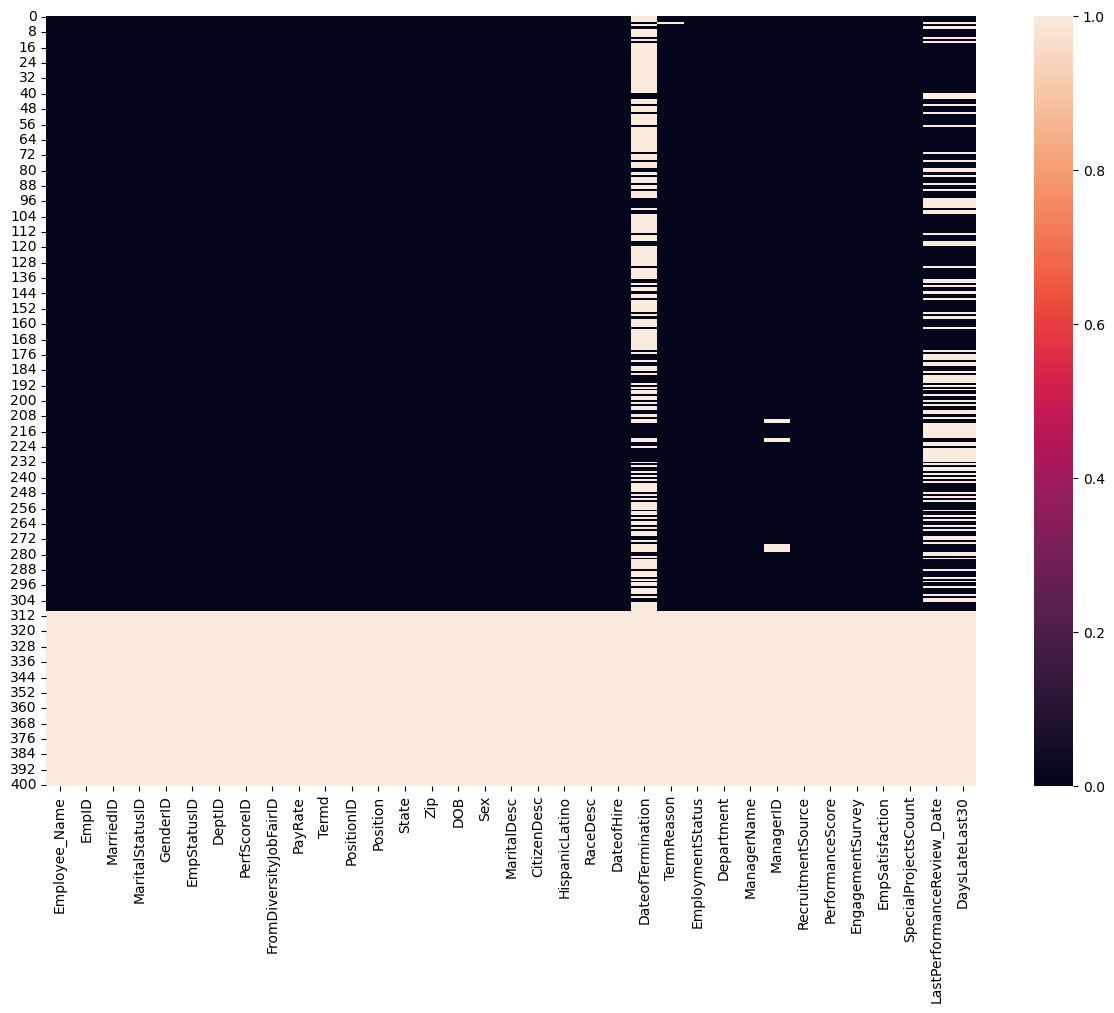

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [31]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [33]:
df.dropna(thresh=2,inplace=True)

Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

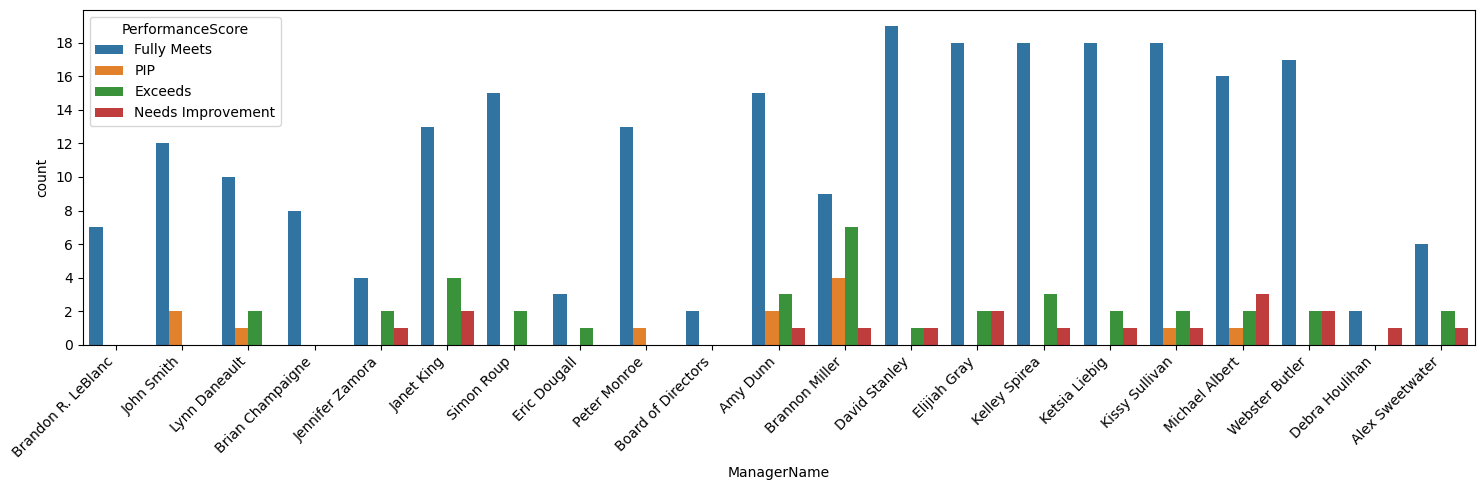

In [84]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='ManagerName', hue='PerformanceScore')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them
plt.tight_layout()  # Adjust layout to prevent label cuto
# Ensure y-axis values are integers
import matplotlib.ticker as mticker
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [99]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [101]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire']).days  / 365.25

In [103]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

In [107]:
pd.set_option('display.max_columns', None)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,1987-11-24,F,Married,US Citizen,No,Black or African American,2008-10-27,NaT,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,10.915811
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,1984-04-26,M,Divorced,US Citizen,No,Black or African American,2014-01-06,NaT,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,5.722108
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,1986-09-01,M,Single,US Citizen,No,White,2014-09-29,NaT,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,4.993840
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,1985-09-16,F,Married,US Citizen,No,White,2015-02-16,2015-04-15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN,0.158795
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,1988-05-19,F,Single,US Citizen,No,White,2015-05-01,NaT,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,4.407940


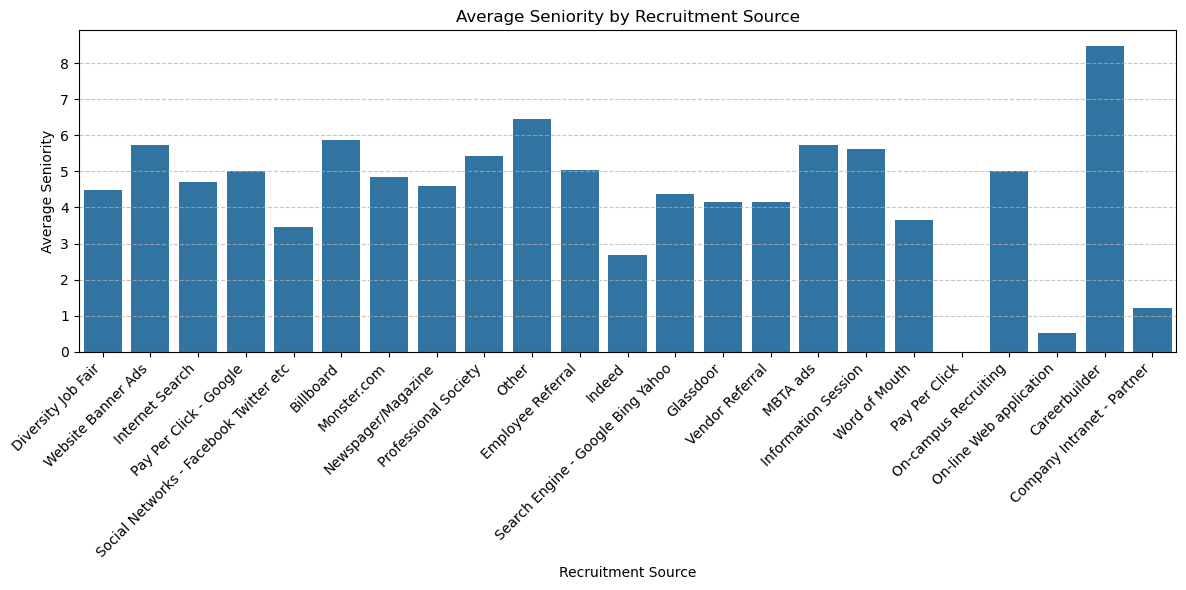

In [171]:
plt.figure(figsize=(12, 6))
sns.barplot(x='RecruitmentSource', y='Seniority', data=df, estimator='mean',  errorbar=None)
plt.title('Average Seniority by Recruitment Source')
plt.xticks(rotation=45)
plt.xlabel('Recruitment Source')
plt.ylabel('Average Seniority')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them
plt.tight_layout()  # Adjust layout to prevent label cuto
# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines only on the y-axis
plt.show()

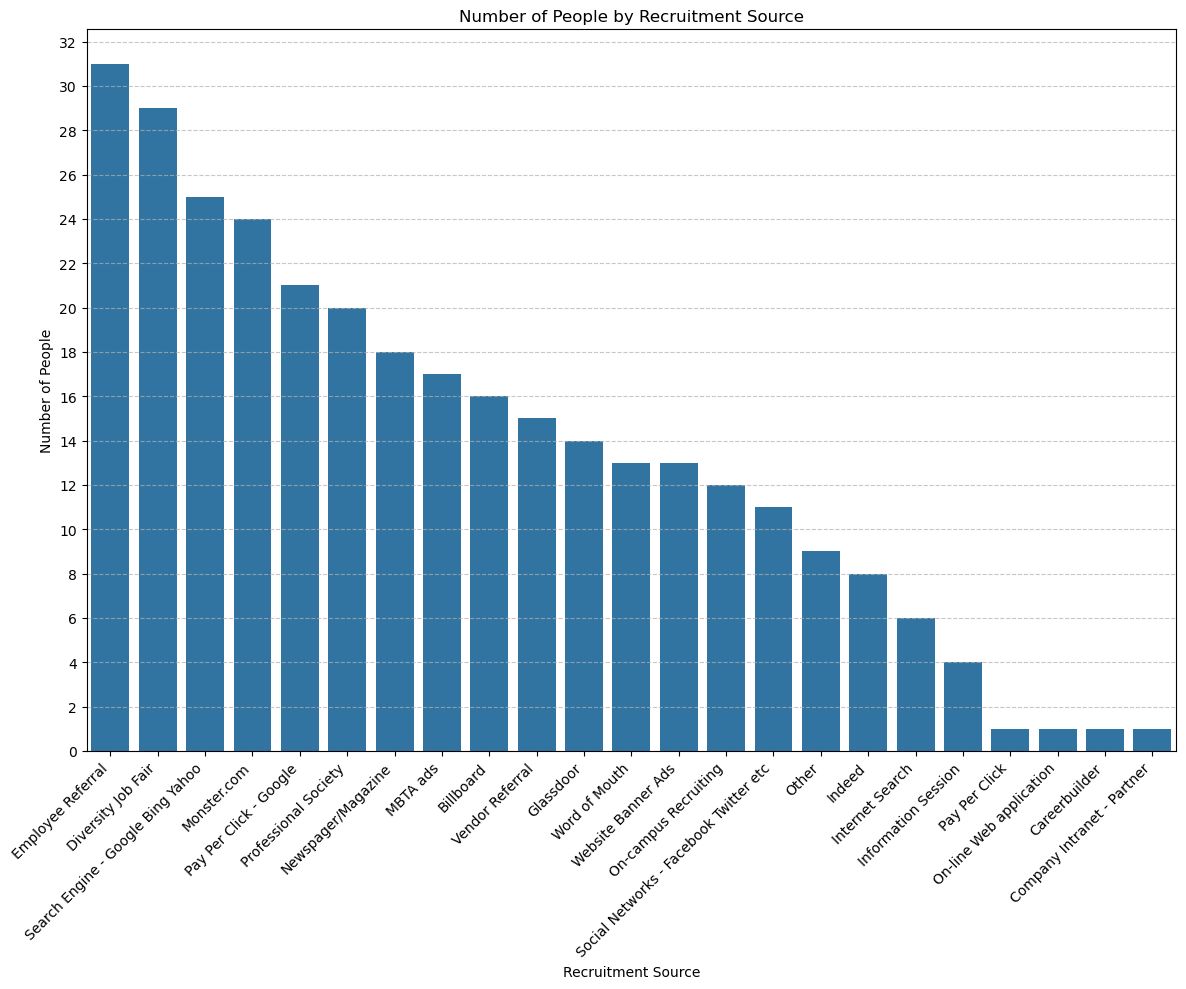

In [185]:
# Bar plot for the number of people in each Recruitment Source
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='RecruitmentSource', order=df['RecruitmentSource'].value_counts().index)
plt.title('Number of People by Recruitment Source')
plt.xticks(rotation=45)
plt.xlabel('Recruitment Source')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them
plt.tight_layout()  # Adjust layout to prevent label cuto
# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines only on the y-axis
import matplotlib.ticker as ticker
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.show()

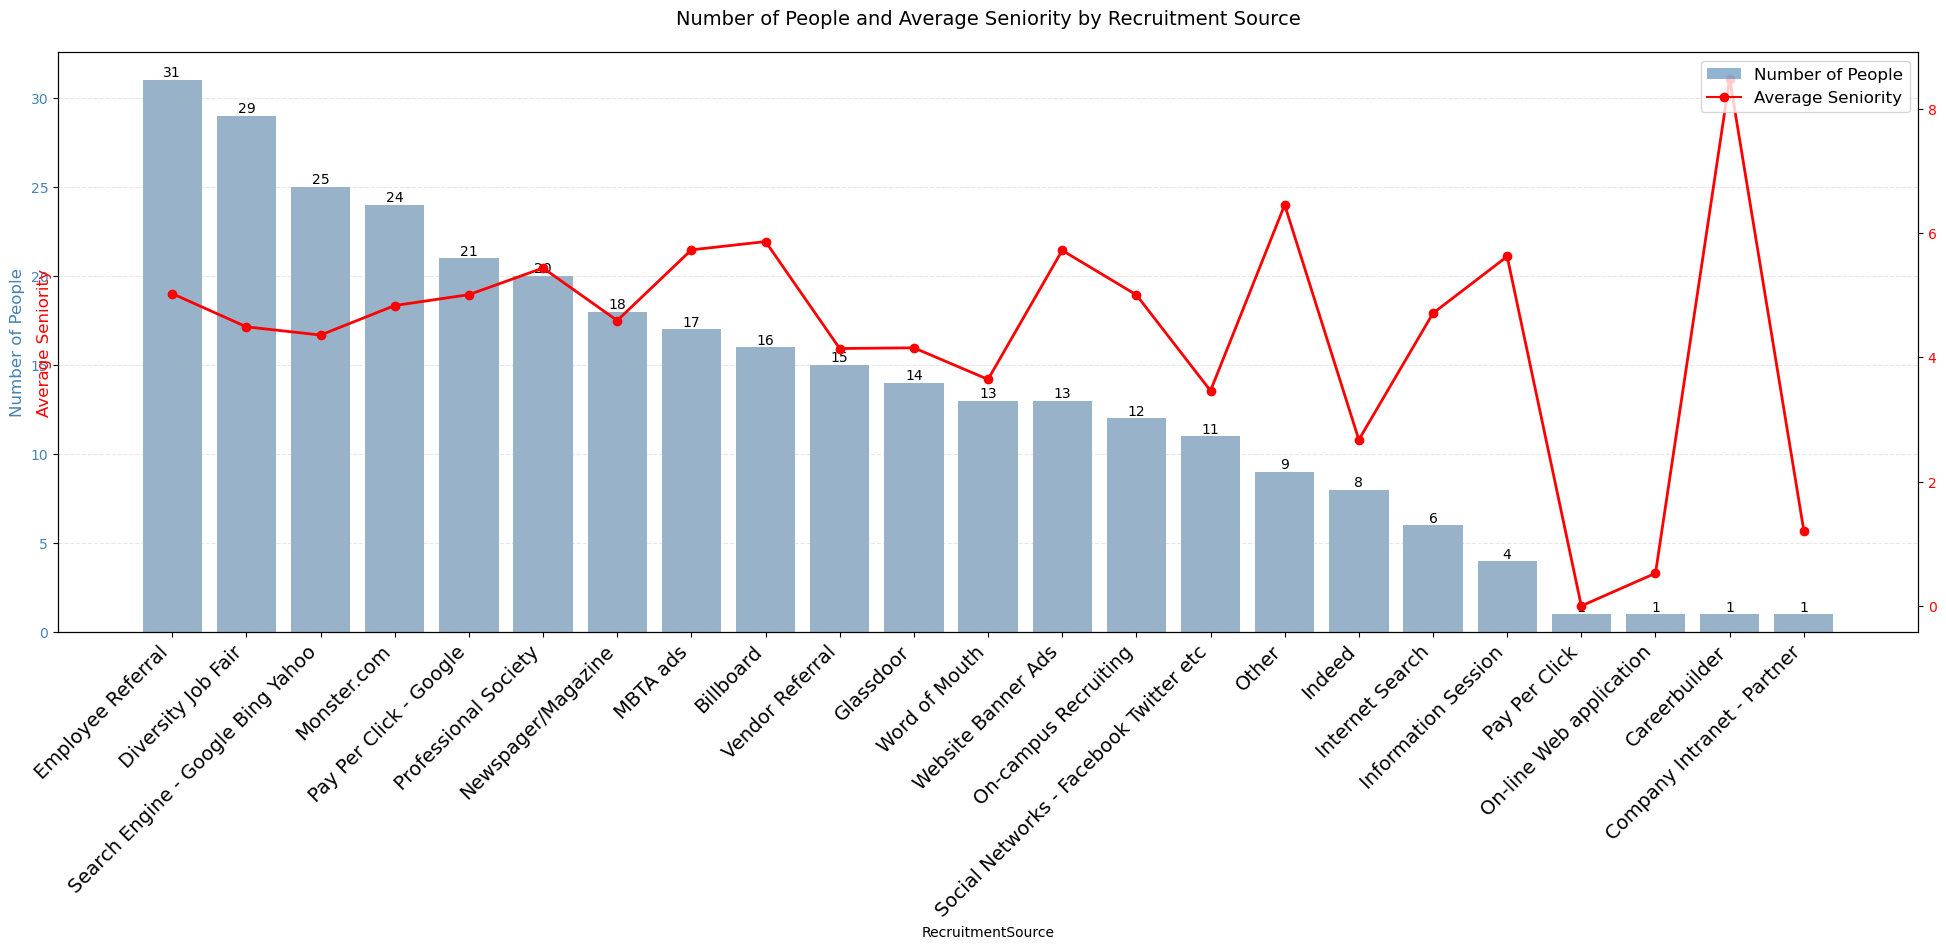

In [387]:
# Adjust figure size to better accommodate long x-axis labels
plt.figure(figsize=(24, 10))

# Create the bar plot
ax1 = plt.gca()
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis

# Use the order from value_counts() for consistent x-axis ordering
order = df['RecruitmentSource'].value_counts().index

# Plot count of people using sns.countplot
sns.countplot(data=df, x='RecruitmentSource', order=order, 
              color='steelblue', alpha=0.6, ax=ax1)
ax1.set_ylabel('Number of People', color='steelblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='steelblue')

# Plot average seniority using sns.barplot converted to line
avg_seniority = sns.barplot(x='RecruitmentSource', y='Seniority', data=df, 
                           estimator='mean', errorbar=None, order=order, 
                           color='none', ax=ax2)

# Convert the average seniority bars to a line plot
line_data = [p.get_height() for p in avg_seniority.patches]
ax2.clear()  # Clear the bar plot
ax2.plot(range(len(order)), line_data, color='red', marker='o', 
         linewidth=2, markersize=6)

# Set x-axis labels to actual RecruitmentSource names
plt.xticks(range(len(order)), order, rotation=45, ha='right', fontsize=10)

ax2.set_ylabel('Average Seniority', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Customize appearance
plt.title('Number of People and Average Seniority by Recruitment Source', 
          fontsize=14, pad=20)

# Add value labels on top of bars
for i, patch in enumerate(ax1.patches):
    height = patch.get_height()
    ax1.text(patch.get_x() + patch.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# Add legend
from matplotlib.lines import Line2D
custom_lines = [
    plt.Rectangle((0,0),1,1, fc='steelblue', alpha=0.6),
    Line2D([0], [0], color='red', marker='o')
]
plt.legend(custom_lines, ['Number of People', 'Average Seniority'], 
          loc='upper right', fontsize=12)

# Add gridlines only for the left y-axis
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff and give more space for x-labels
plt.subplots_adjust(bottom=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=14)
plt.show()


Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

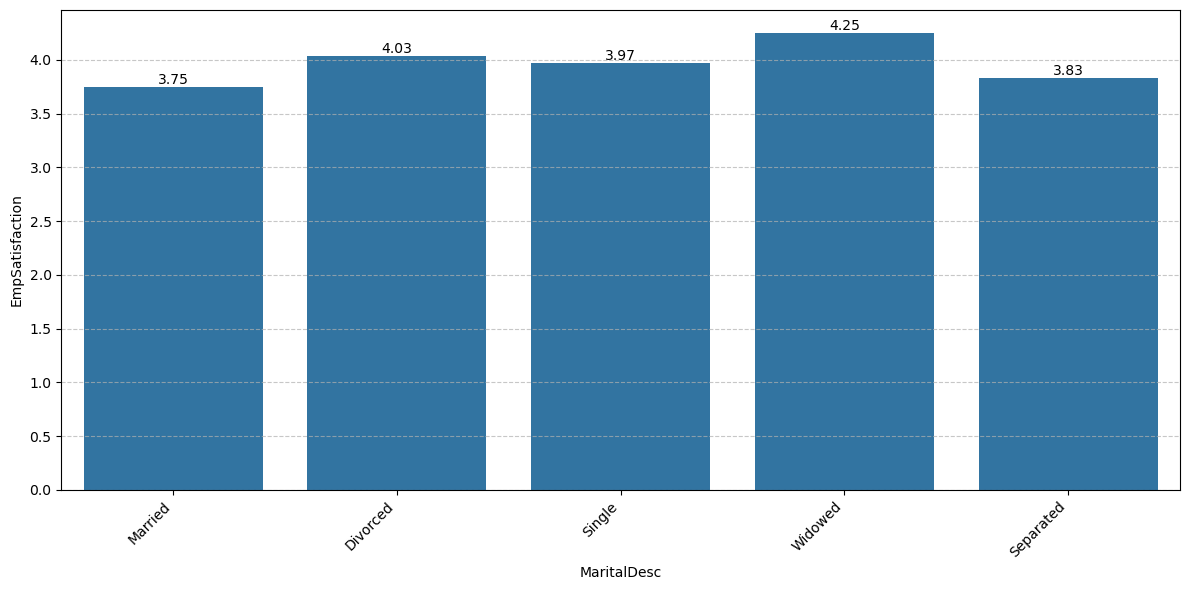

In [327]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='MaritalDesc', y='EmpSatisfaction', data=df, estimator='mean',  errorbar=None)
plt.xticks(rotation=45)
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them
plt.tight_layout()  # Adjust layout to prevent label cuto
# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines only on the y-axis
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
plt.show()

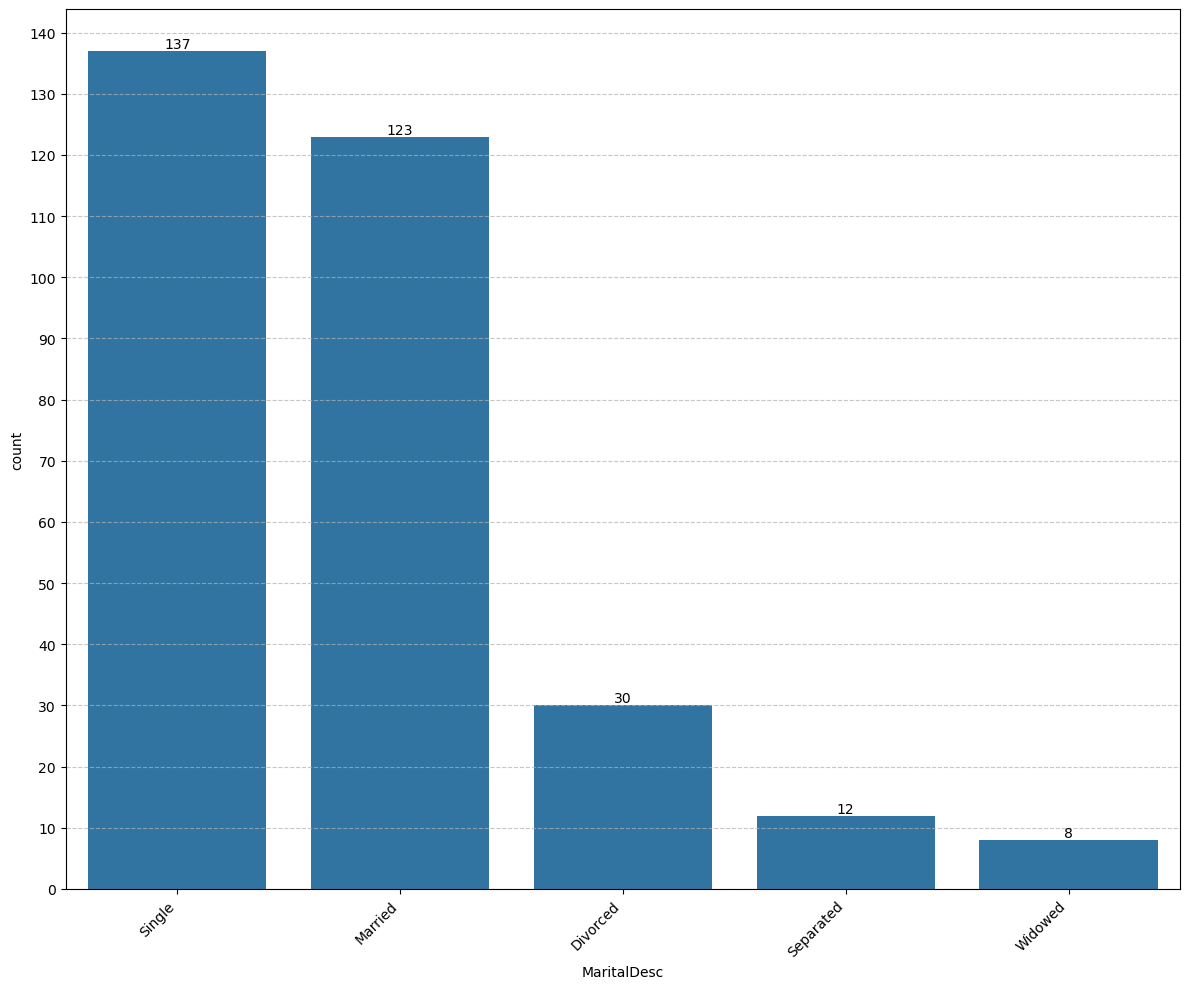

In [325]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='MaritalDesc', order=df['MaritalDesc'].value_counts().index)
plt.xticks(rotation=45)
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them
plt.tight_layout()  # Adjust layout to prevent label cuto
# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines only on the y-axis
import matplotlib.ticker as ticker
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [224]:
import datetime as dt

def count_age(row):
    end_date = dt.datetime(2019, 9, 27)  # Fixed indentation
    start_date = row['DOB']
    return (end_date - start_date).days / 365.25  # Fixed indentation

# Applying the function to calculate seniority
df['Age'] = df.apply(lambda row: count_age(row), axis=1)

In [230]:
# Define age bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 100]  # Adjust ranges as needed
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create a new column for age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [232]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority,Age,AgeGroup
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,1987-11-24,F,Married,US Citizen,No,Black or African American,2008-10-27,NaT,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,10.915811,31.841205,30-39
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,1984-04-26,M,Divorced,US Citizen,No,Black or African American,2014-01-06,NaT,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,5.722108,35.419576,30-39
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,1986-09-01,M,Single,US Citizen,No,White,2014-09-29,NaT,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,4.993840,33.070500,30-39
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,1985-09-16,F,Married,US Citizen,No,White,2015-02-16,2015-04-15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN,0.158795,34.028747,30-39
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,1988-05-19,F,Single,US Citizen,No,White,2015-05-01,NaT,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,4.407940,31.356605,30-39


In [238]:
empty_date_rows = df[df['DateofTermination'].isna()]

In [240]:
# Count the number of people in each age group
age_structure = empty_date_rows['AgeGroup'].value_counts().sort_index()

print(age_structure)

AgeGroup
<20        0
20-29     11
30-39    103
40-49     64
50-59      3
60-69      0
70+        0
Name: count, dtype: int64


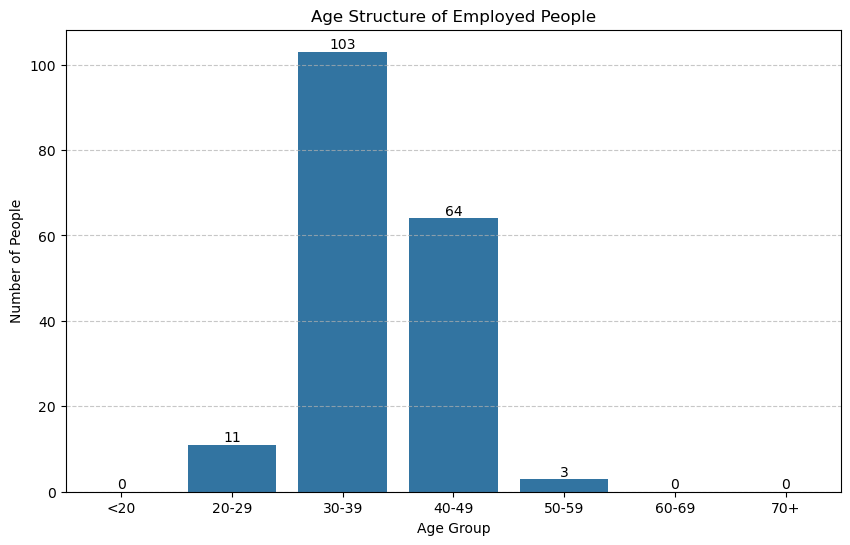

In [317]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_structure.index, y=age_structure.values)
plt.title('Age Structure of Employed People')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines only on the y-axis
# Add value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [283]:
age_special_projects_mean = df.groupby('AgeGroup')['SpecialProjectsCount'].mean().reset_index()

C:\Users\wikto\AppData\Local\Temp\ipykernel_23388\2717071033.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_special_projects_mean = df.groupby('AgeGroup')['SpecialProjectsCount'].mean().reset_index()


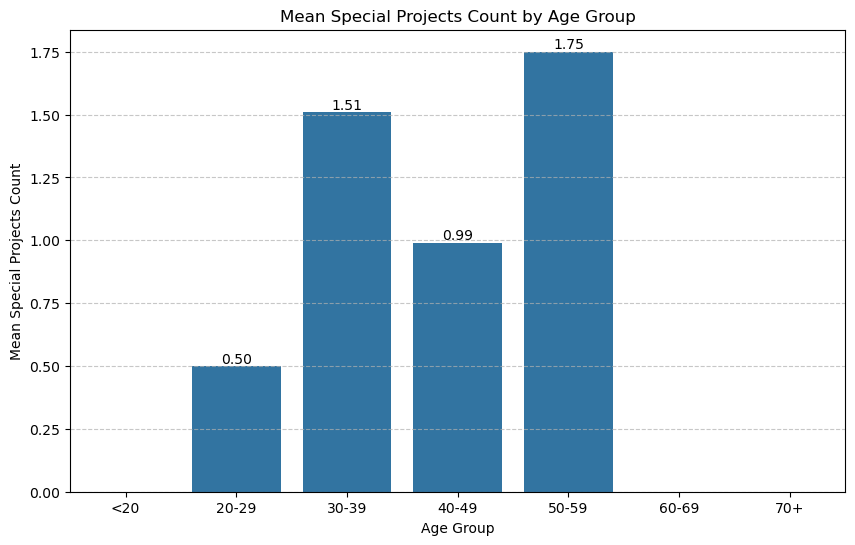

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create the bar plot for the mean of SpecialProjectsCount
ax = sns.barplot(x=age_special_projects_mean['AgeGroup'], y=age_special_projects_mean['SpecialProjectsCount'])

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
    
# Customize labels and title
plt.title('Mean Special Projects Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Special Projects Count')

# Show the plot
plt.show()
